<a href="https://colab.research.google.com/github/semal/outsource/blob/master/data_analysis_20210417v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 初始化分析环境

In [110]:
import numpy as np
from scipy.stats import zscore
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7 * 2,8.27 * 2)})

# 导入和查看数据

In [91]:
data_bzp = pd.read_excel('data.xlsx', sheet_name='标准品')
data_bzp.fillna(method='pad', inplace=True)
data_bl = pd.read_excel('data.xlsx', sheet_name='伯乐')
data_bl.fillna(method='pad', inplace=True)
data_kj = pd.read_excel('data.xlsx', sheet_name='凯杰')
data_kj.fillna(method='pad', inplace=True)

## 标准品的基本统计

In [92]:
data_bzp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO.,90.0,11.800000,6.608133,1.000000,6.000000,12.000000,17.000000,24.000000
Concentration (copies/μl)-Cy5-1,90.0,99.937778,12.177042,81.700000,94.025000,98.050000,104.125000,144.200000
Concentration (copies/μl)-FAM-18,90.0,96.857778,11.814227,79.000000,89.375000,96.250000,101.950000,139.600000
Concentration (copies/μl)-HEX-21,90.0,122.147778,18.468882,96.100000,111.375000,119.100000,126.950000,190.900000
Concentration (copies/μl)-ROX-21,90.0,107.124444,17.594332,85.600000,96.875000,103.450000,107.950000,177.500000
Cy5 / HEX,90.0,0.821611,0.032212,0.751129,0.798528,0.819422,0.843687,0.898352
FAM / HEX,90.0,0.796260,0.033428,0.707606,0.777793,0.800456,0.818446,0.867556
HEX / ROX,90.0,1.142443,0.044678,1.033915,1.109333,1.146165,1.170302,1.227273
Cy5 / ROX,90.0,0.938343,0.045618,0.799880,0.910765,0.950529,0.968347,1.028972
FAM / ROX,90.0,0.909656,0.051342,0.776267,0.887628,0.915052,0.944621,1.022200


## 伯乐的基本统计

In [78]:
data_bl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO.,5.0,3.000,1.581139,1.00,2.00,3.00,4.00,5.00
Time,5.0,411.000,0.000000,411.00,411.00,411.00,411.00,411.00
Concentration (copies/μl)-FAM-18,5.0,37.780,2.380546,35.20,35.90,37.30,40.10,40.40
Concentration (copies/μl)-VIC-21,5.0,46.360,1.803607,44.00,45.00,46.80,47.90,48.10
events,5.0,12440.000,646.417435,11744.00,11938.00,12419.00,12740.00,13359.00
FAM/VIC,5.0,0.818,0.071204,0.75,0.75,0.83,0.84,0.92


## 凯杰的基本统计

In [79]:
data_kj.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No.,92.0,46.500000,26.702060,1.000000,23.750000,46.500000,69.250000,92.000000
Concentration (copies/μl)-Cy5-1,92.0,63.331522,30.652121,23.500000,43.575000,54.100000,74.125000,188.600000
Concentration (copies/μl)-FAM-18,92.0,56.597826,27.769962,19.500000,37.975000,48.250000,66.475000,161.200000
Concentration (copies/μl)-HEX-21,92.0,75.359783,37.227554,24.800000,51.550000,65.500000,88.575000,225.400000
Concentration (copies/μl)-ROX-21,92.0,65.276087,30.982620,23.600000,44.175000,55.900000,76.150000,187.600000
Cy5 / HEX,92.0,0.846517,0.048149,0.736111,0.813177,0.845876,0.874741,0.971556
FAM / HEX,92.0,0.753225,0.043992,0.660682,0.722121,0.752442,0.783254,0.878220
HEX / ROX,92.0,1.148307,0.062270,0.988048,1.098440,1.147070,1.189881,1.318766
Cy5 / ROX,92.0,0.970360,0.049885,0.864217,0.936786,0.962736,1.002358,1.073593
FAM / ROX,92.0,0.863696,0.050949,0.750636,0.828816,0.861440,0.896637,1.000000


# 探索性数据分析

## 标准品数据

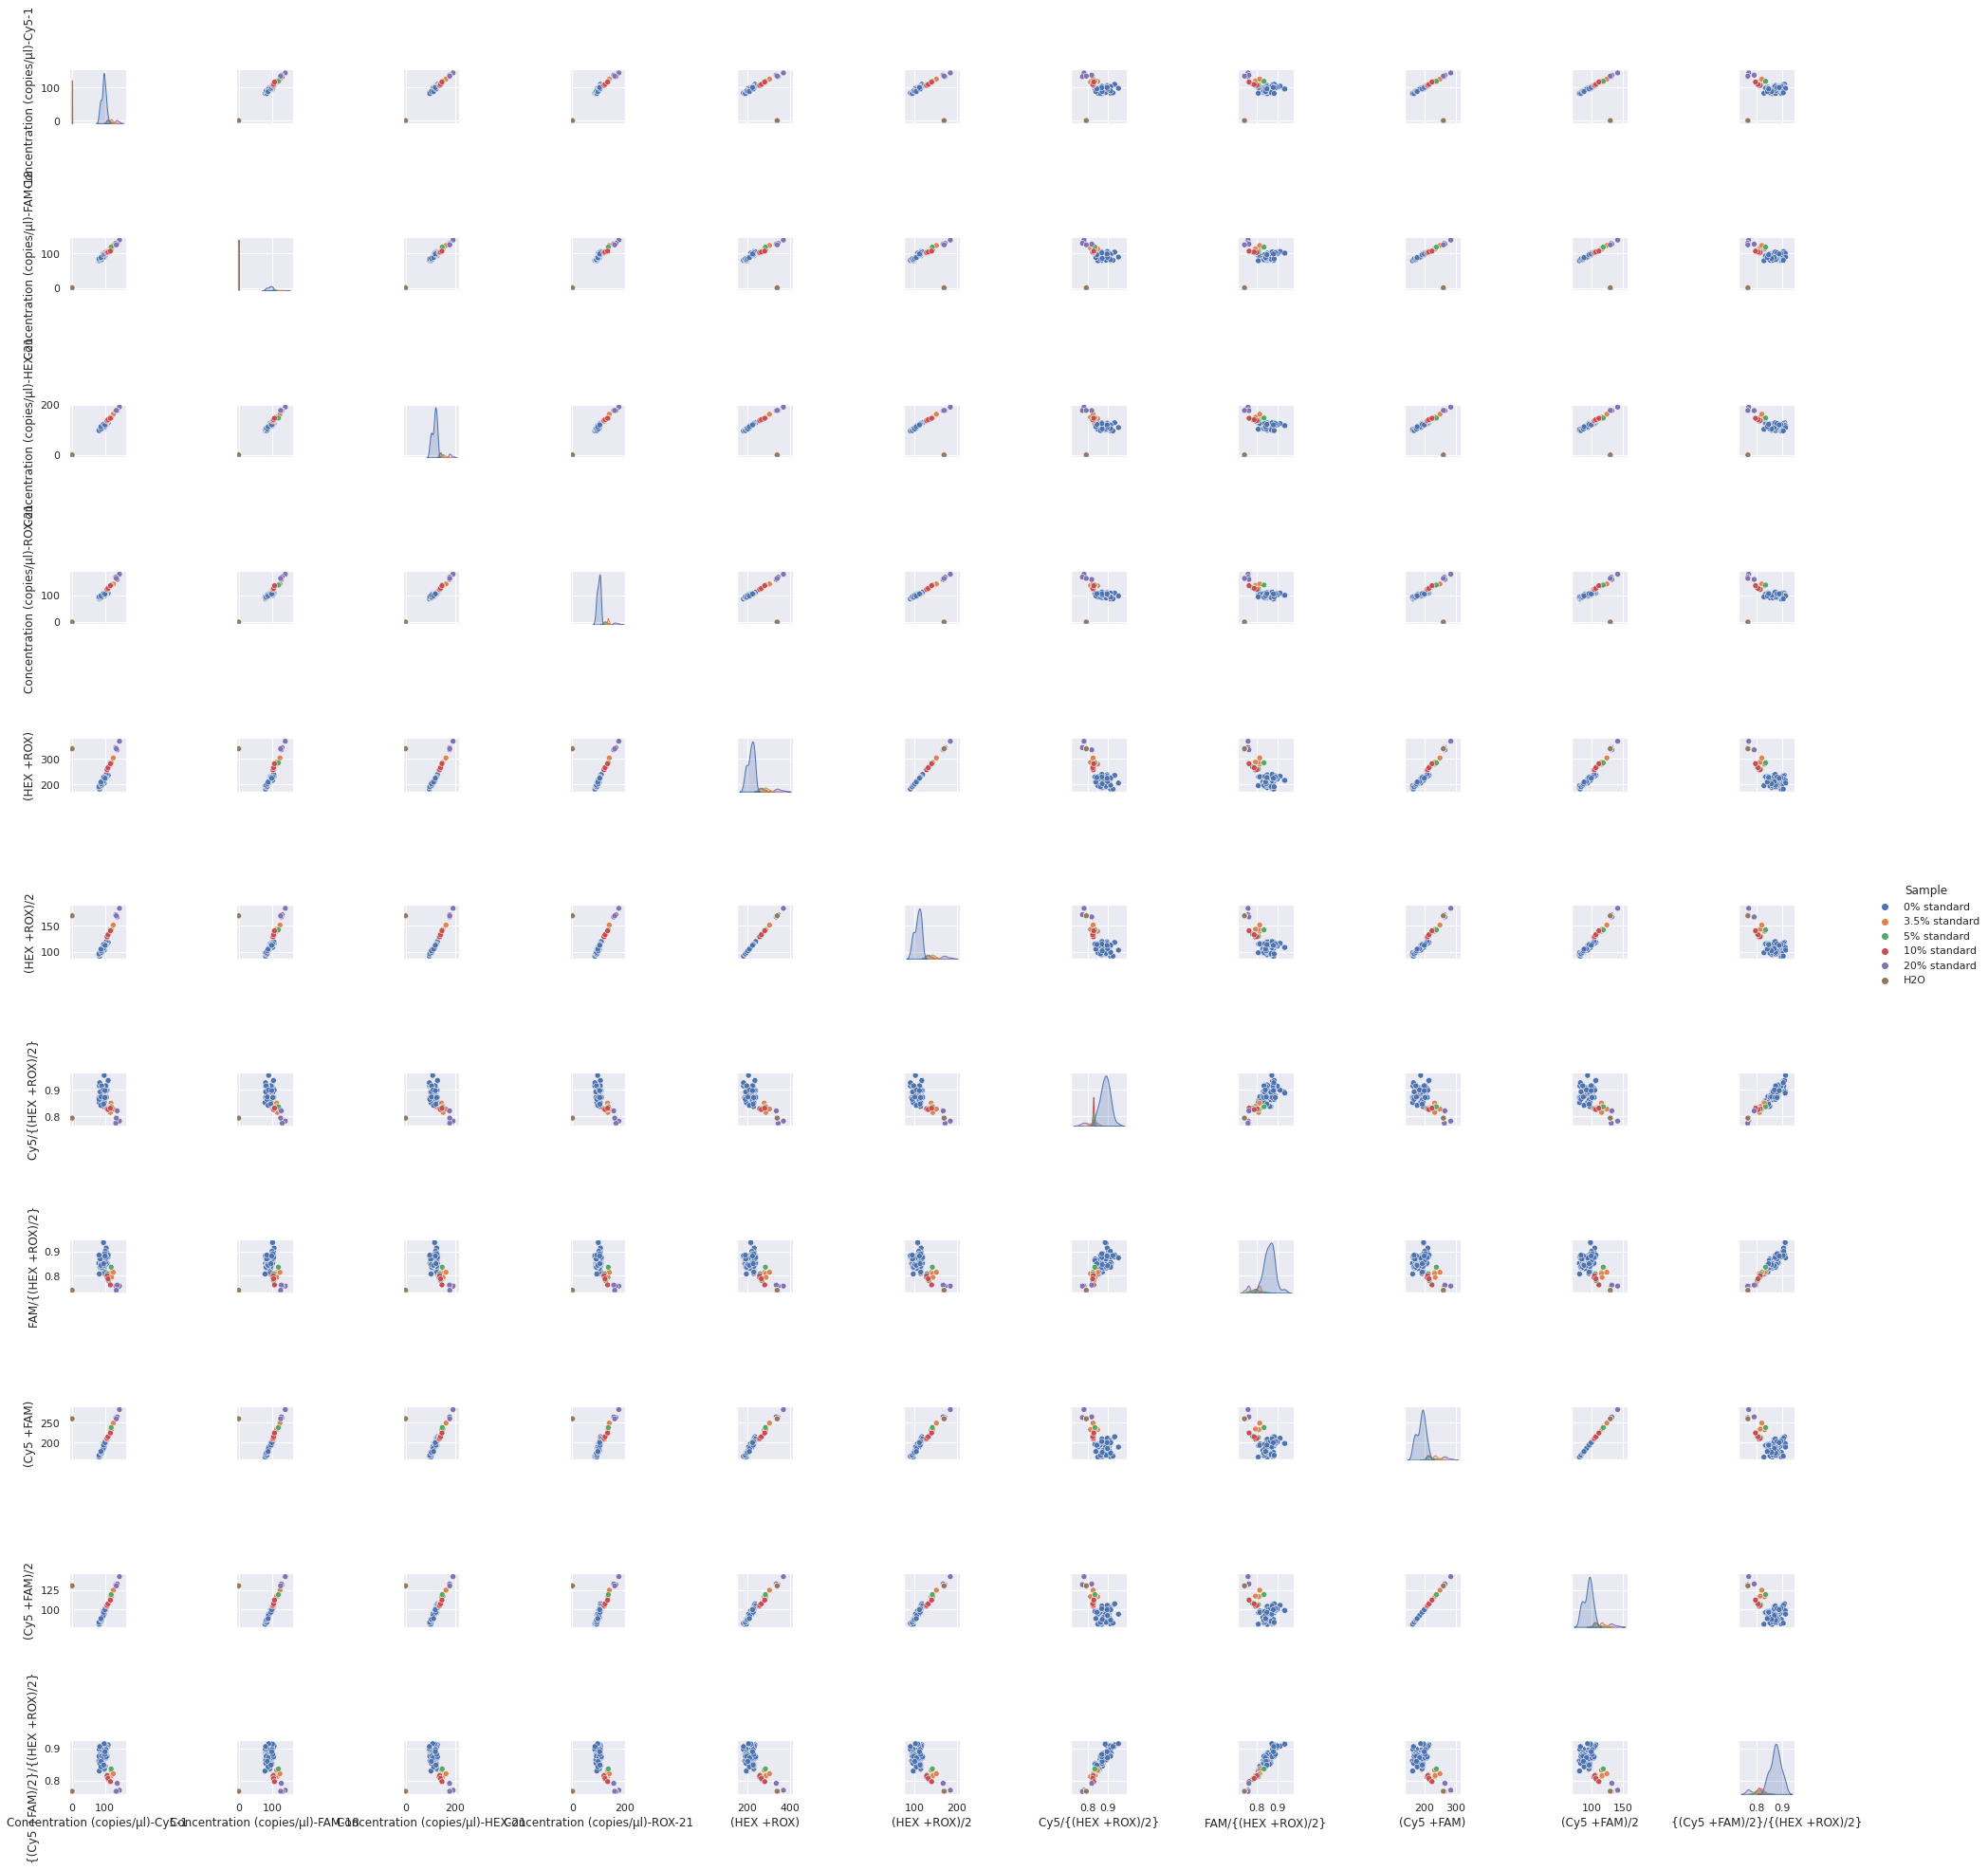

In [57]:
_ = sns.pairplot(data_bzp[data_bzp['Sample'] != 'H20'], hue='Sample')

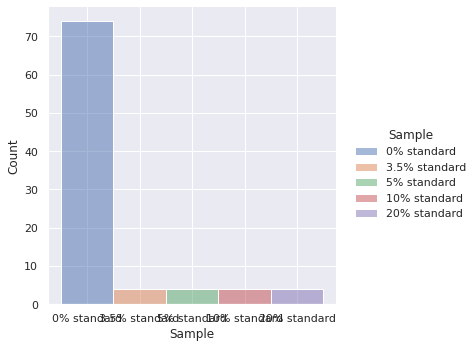

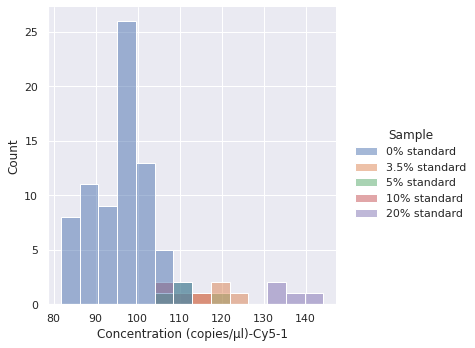

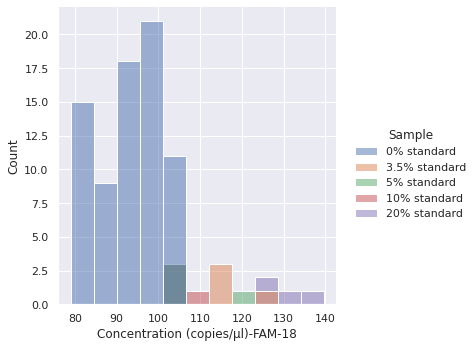

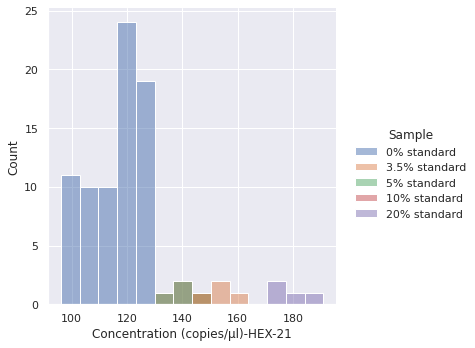

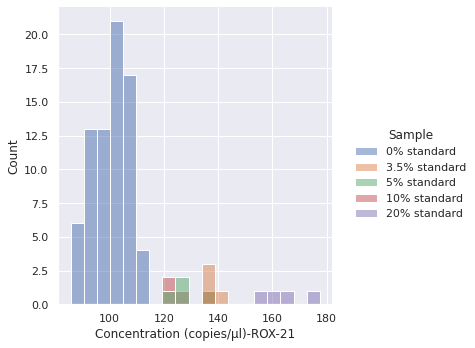

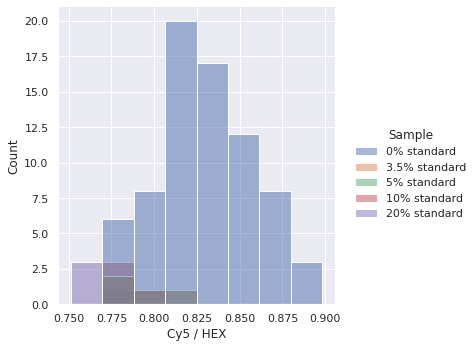

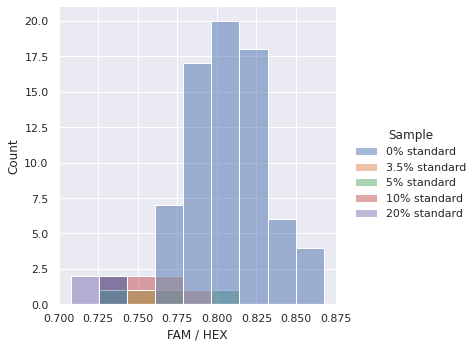

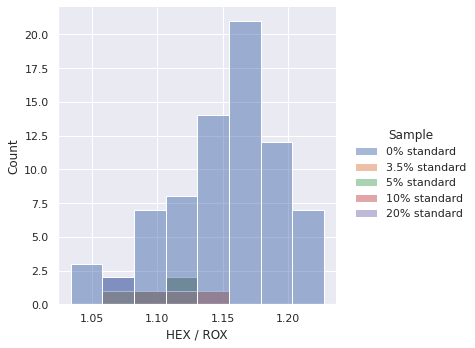

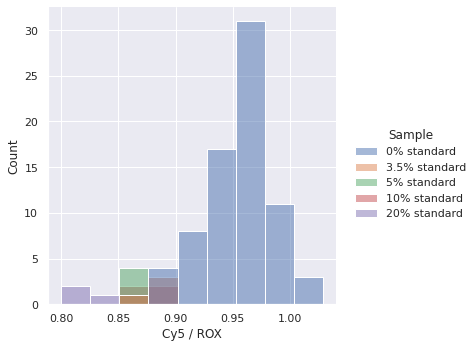

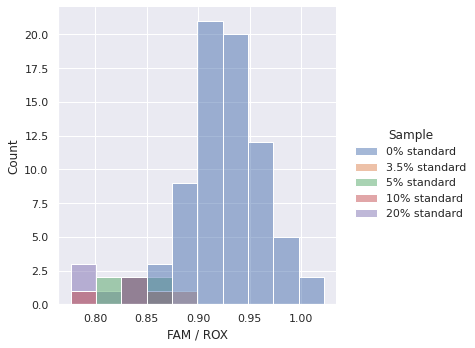

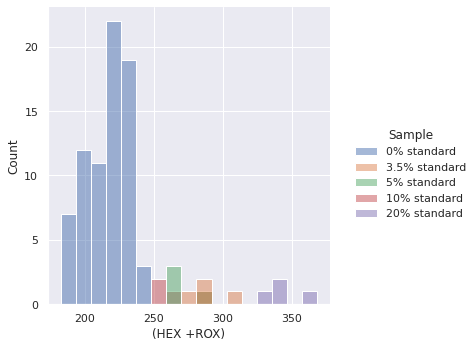

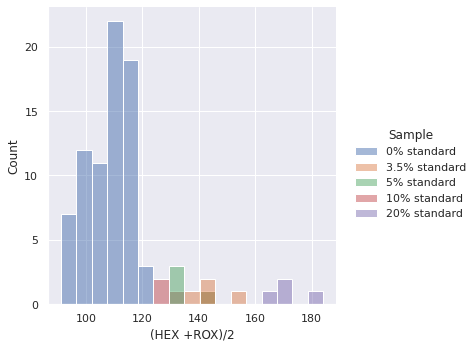

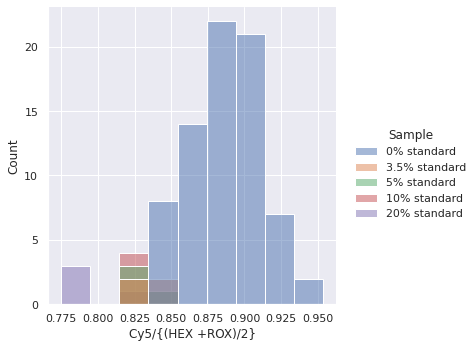

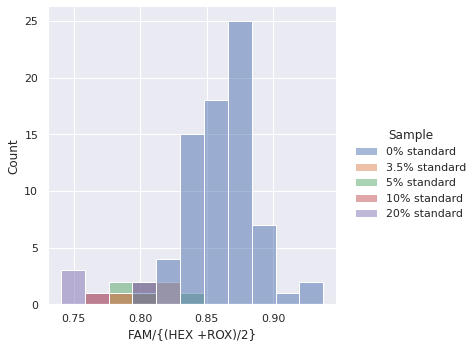

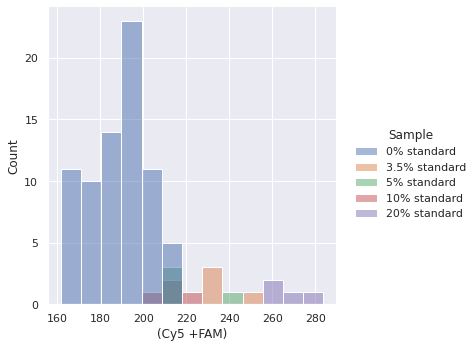

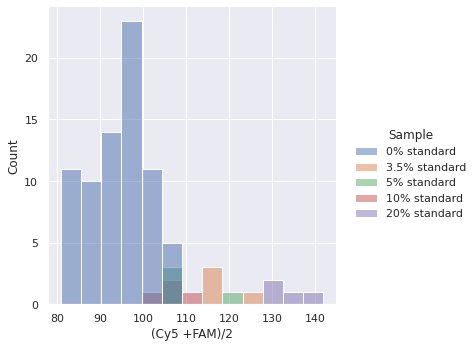

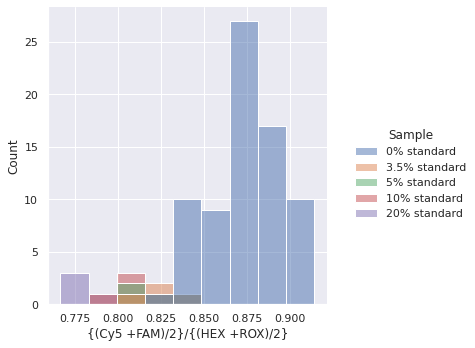

In [64]:
for column_name in data_bzp.columns:
  if column_name in ['Time', '备注', 'NO.']:
    continue
  _ = sns.displot(data_bzp[data_bzp['Sample'] != 'H2O'], x=column_name, hue='Sample')

In [94]:
data_bzp_wo_h2o = data_bzp[data_bzp['Sample'] != 'H2O']
data_bzp_wo_h2o['sample_type'] = data_bzp_wo_h2o['Sample'].apply(lambda x: 'negative' if x == '0% standard' else 'positive')

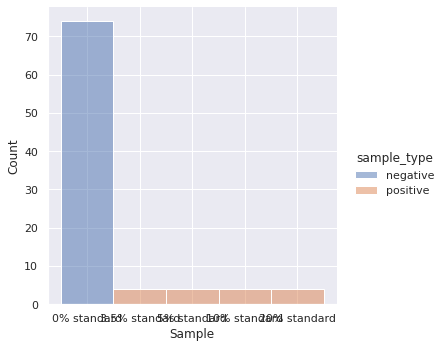

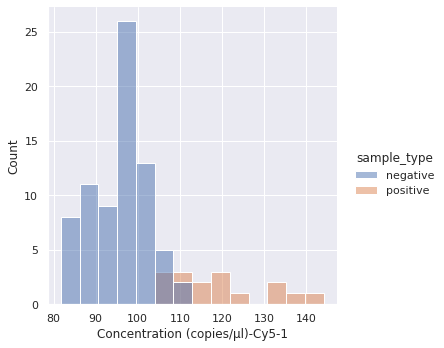

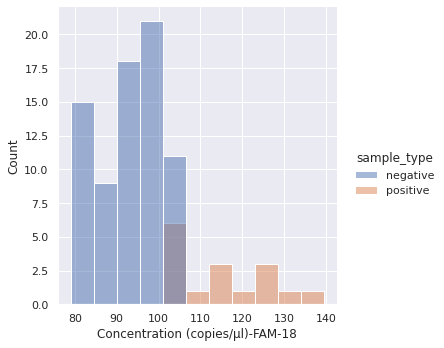

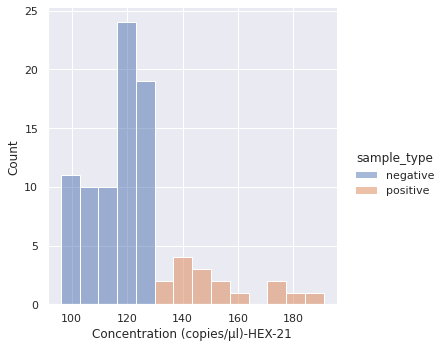

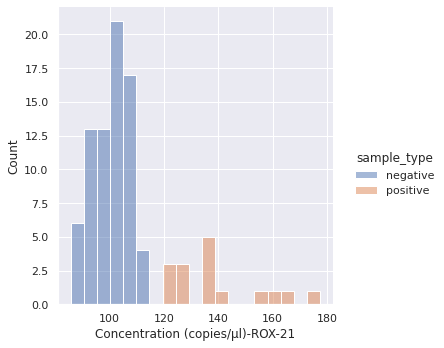

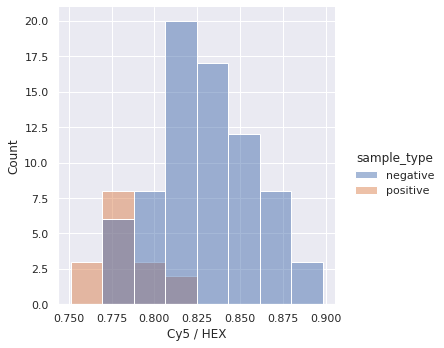

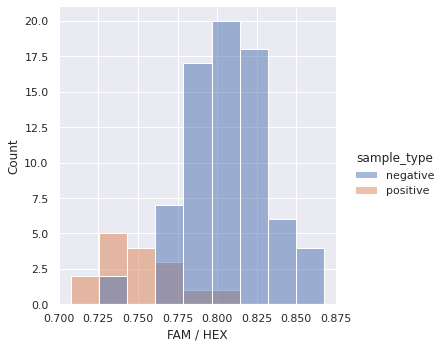

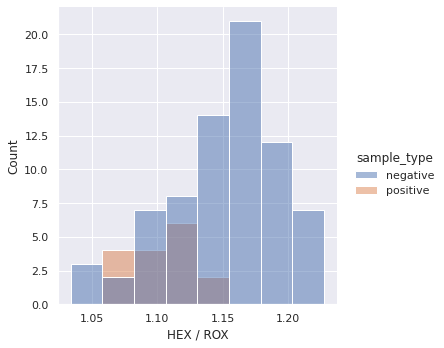

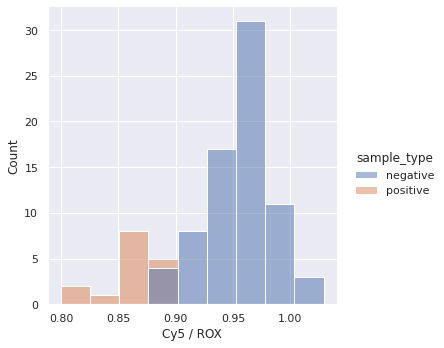

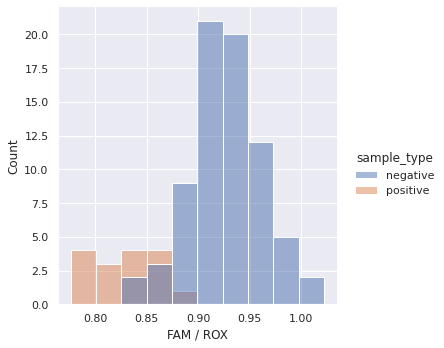

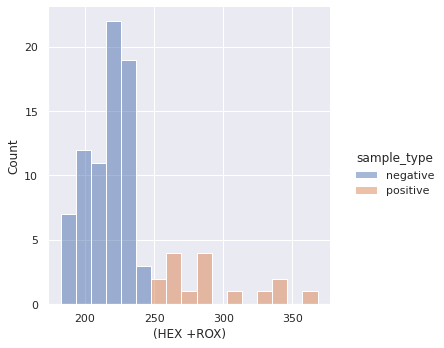

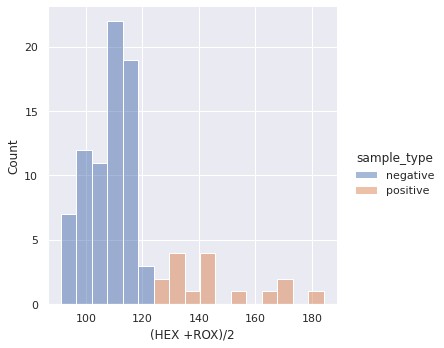

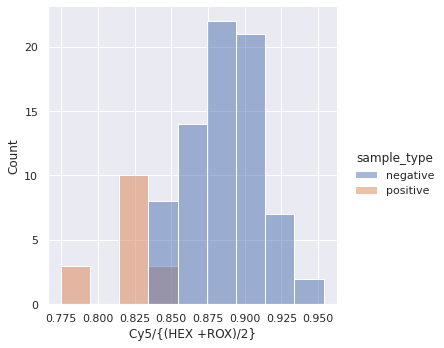

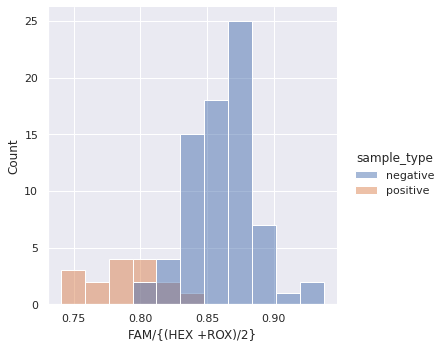

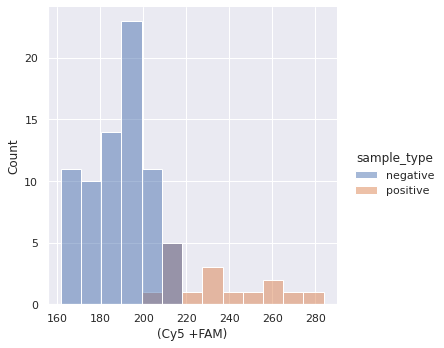

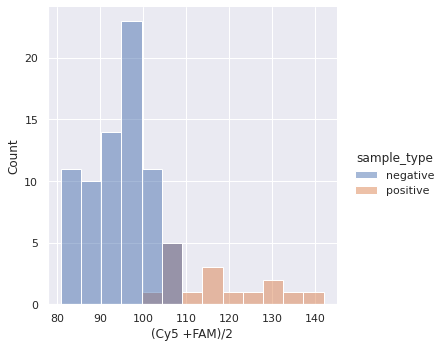

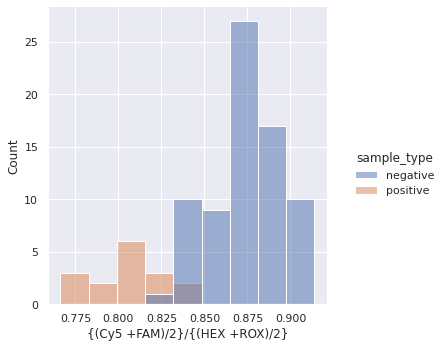

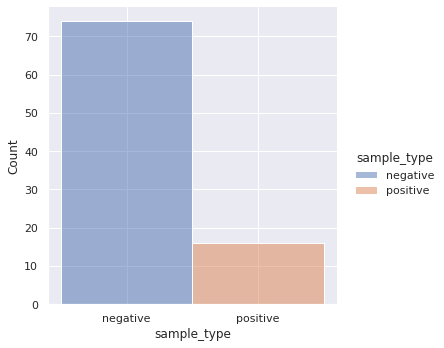

In [84]:
for column_name in data_bzp_wo_h2o.columns:
  if column_name in ['Time', '备注', 'NO.']:
    continue
  _ = sns.displot(data_bzp_wo_h2o[data_bzp_wo_h2o['Sample'] != 'H2O'], x=column_name, hue='sample_type')

In [95]:
data_bzp_wo_h2o[data_bzp_wo_h2o['sample_type'] == 'negative'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO.,74.0,11.648649,6.960618,1.000000,5.250000,11.500000,17.750000,24.000000
Concentration (copies/μl)-Cy5-1,74.0,95.614865,6.719766,81.700000,90.600000,96.150000,100.450000,110.100000
Concentration (copies/μl)-FAM-18,74.0,92.933784,7.419103,79.000000,86.200000,93.900000,98.975000,106.200000
Concentration (copies/μl)-HEX-21,74.0,115.375676,9.461281,96.100000,107.100000,118.150000,123.225000,128.500000
Concentration (copies/μl)-ROX-21,74.0,100.178378,6.328545,85.600000,95.100000,100.850000,105.550000,110.700000
Cy5 / HEX,74.0,0.829992,0.028174,0.774818,0.810276,0.827392,0.850640,0.898352
FAM / HEX,74.0,0.806092,0.026234,0.735759,0.787156,0.810052,0.822762,0.867556
HEX / ROX,74.0,1.150887,0.043680,1.033915,1.119234,1.158629,1.179350,1.227273
Cy5 / ROX,74.0,0.954471,0.030230,0.882353,0.936825,0.956138,0.973085,1.028972
FAM / ROX,74.0,0.927230,0.035389,0.843992,0.902003,0.929827,0.949021,1.022200


### z 值分析

In [108]:
data_bzp_wo_h2o_negative = data_bzp_wo_h2o[data_bzp_wo_h2o['sample_type'] == 'negative']
data_bzp_wo_h2o_positive = data_bzp_wo_h2o[data_bzp_wo_h2o['sample_type'] == 'positive']
for column_name in data_bzp_wo_h2o_positive.columns:
  if 'copies' in column_name:
    continue
  if column_name in ['NO.', '备注', 'Time', 'Sample', 'sample_type']:
    continue
  data_bzp_wo_h2o_positive['%s-zvalue' % column_name] = data_bzp_wo_h2o_positive[column_name].apply(
      lambda x: (x - data_bzp_wo_h2o_negative.mean()[column_name]) / data_bzp_wo_h2o_negative.std()[column_name])
for column_name in data_bzp_wo_h2o_negative.columns:
  if 'copies' in column_name:
    continue
  if column_name in ['NO.', '备注', 'Time', 'Sample', 'sample_type']:
    continue
  data_bzp_wo_h2o_negative['%s-zvalue' % column_name] = data_bzp_wo_h2o_negative[column_name].apply(
      lambda x: (x - data_bzp_wo_h2o_negative.mean()[column_name]) / data_bzp_wo_h2o_negative.std()[column_name])

In [107]:
data_bzp_wo_h2o_positive.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO.,16.0,12.500000,4.760952,5.000000,8.750000,12.500000,16.250000,20.000000
Concentration (copies/μl)-Cy5-1,16.0,119.931250,11.893736,106.200000,110.525000,117.750000,127.475000,144.200000
Concentration (copies/μl)-FAM-18,16.0,115.006250,11.532012,101.800000,104.750000,113.750000,124.100000,139.600000
Concentration (copies/μl)-HEX-21,16.0,153.468750,17.764036,134.800000,140.625000,146.850000,166.025000,190.900000
Concentration (copies/μl)-ROX-21,16.0,139.250000,17.405057,120.800000,126.375000,135.200000,145.250000,177.500000
Cy5 / HEX,16.0,0.782847,0.018555,0.751129,0.774525,0.781935,0.796884,0.819186
FAM / HEX,16.0,0.750787,0.024456,0.707606,0.734132,0.750751,0.762656,0.807196
HEX / ROX,16.0,1.103393,0.024081,1.064904,1.084877,1.106785,1.115480,1.151773
Cy5 / ROX,16.0,0.863749,0.026109,0.799880,0.865330,0.871691,0.879563,0.890780
FAM / ROX,16.0,0.828376,0.031226,0.776267,0.804657,0.836452,0.854300,0.876596


In [109]:
data_bzp_wo_h2o_negative.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NO.,74.0,1.164865e+01,6.960618,1.000000,5.250000,11.500000,17.750000,24.000000
Concentration (copies/μl)-Cy5-1,74.0,9.561486e+01,6.719766,81.700000,90.600000,96.150000,100.450000,110.100000
Concentration (copies/μl)-FAM-18,74.0,9.293378e+01,7.419103,79.000000,86.200000,93.900000,98.975000,106.200000
Concentration (copies/μl)-HEX-21,74.0,1.153757e+02,9.461281,96.100000,107.100000,118.150000,123.225000,128.500000
Concentration (copies/μl)-ROX-21,74.0,1.001784e+02,6.328545,85.600000,95.100000,100.850000,105.550000,110.700000
Cy5 / HEX,74.0,8.299921e-01,0.028174,0.774818,0.810276,0.827392,0.850640,0.898352
FAM / HEX,74.0,8.060916e-01,0.026234,0.735759,0.787156,0.810052,0.822762,0.867556
HEX / ROX,74.0,1.150887e+00,0.043680,1.033915,1.119234,1.158629,1.179350,1.227273
Cy5 / ROX,74.0,9.544715e-01,0.030230,0.882353,0.936825,0.956138,0.973085,1.028972
FAM / ROX,74.0,9.272302e-01,0.035389,0.843992,0.902003,0.929827,0.949021,1.022200


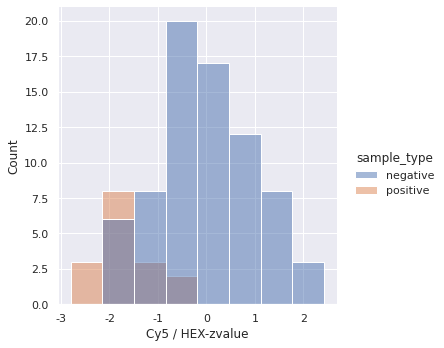

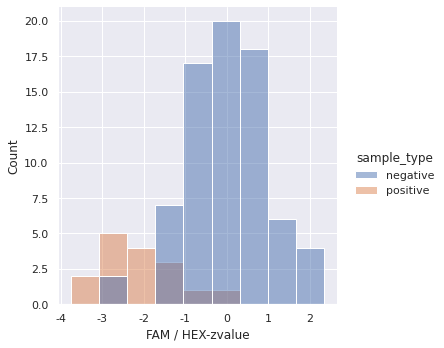

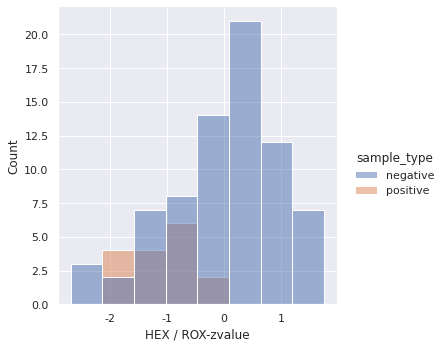

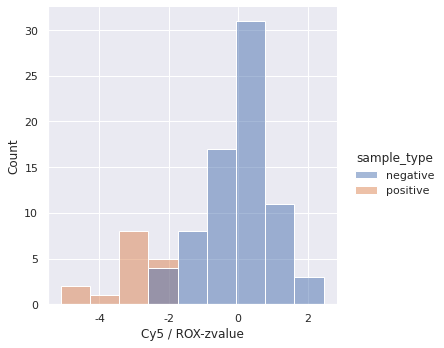

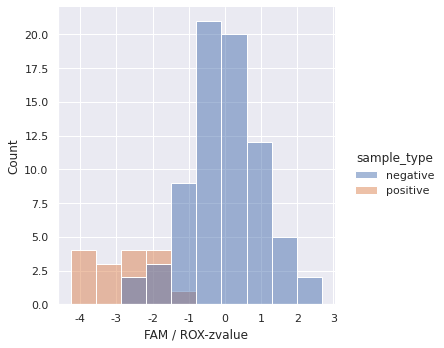

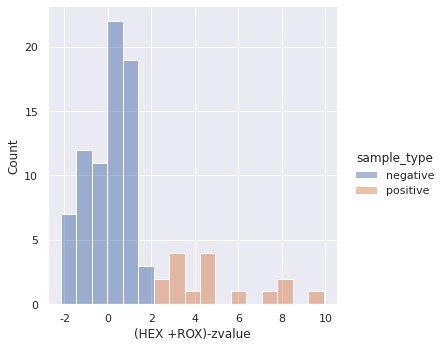

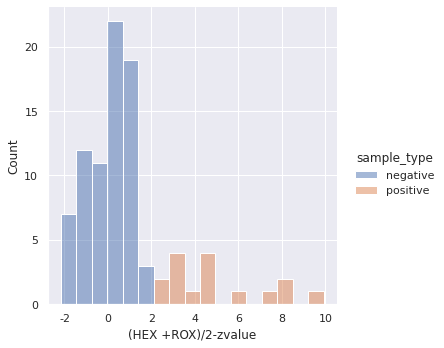

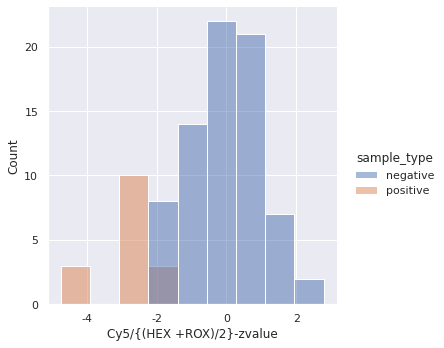

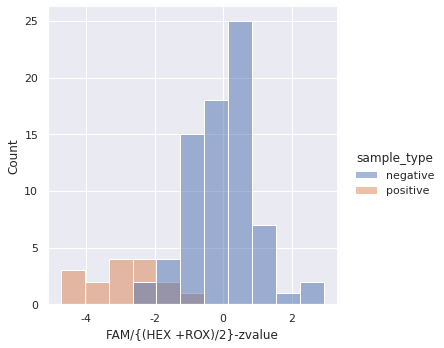

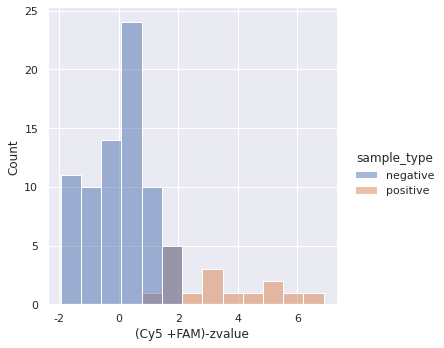

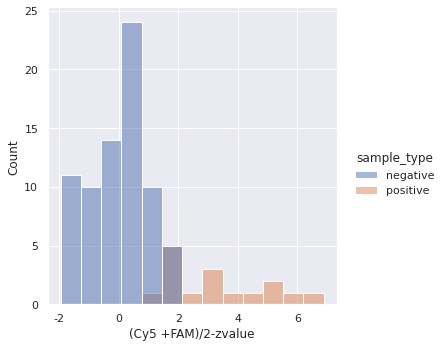

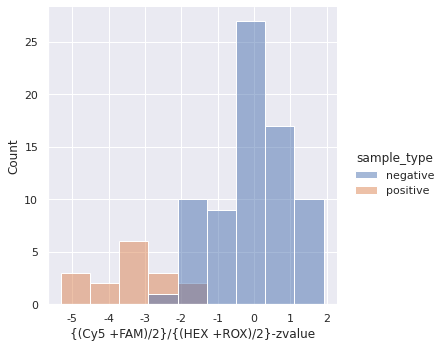

In [125]:
data_bzp_z = pd.concat([data_bzp_wo_h2o_negative, data_bzp_wo_h2o_positive])
for column_name in data_bzp_z.columns:
  if 'zvalue' not in column_name:
    continue
  _ = sns.displot(data_bzp_z, x=column_name, hue='sample_type')

## 伯乐数据

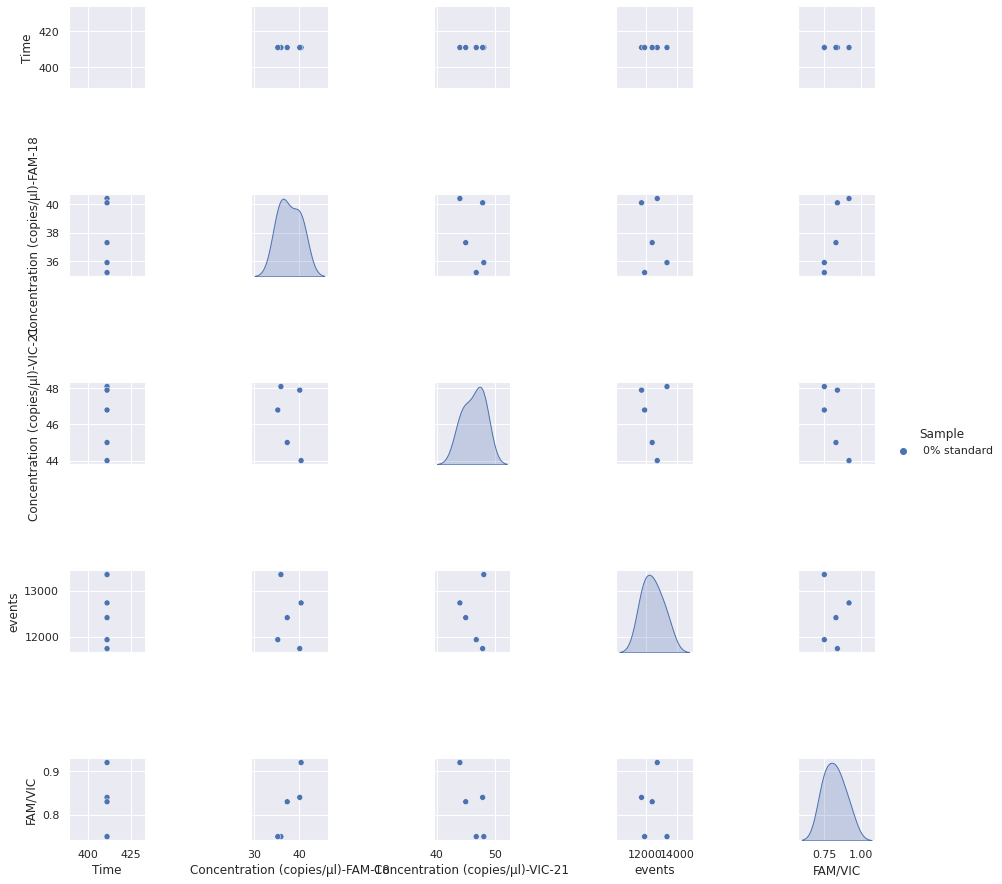

In [59]:
_ = sns.pairplot(data_bl, hue='Sample', )

## 凯杰数据

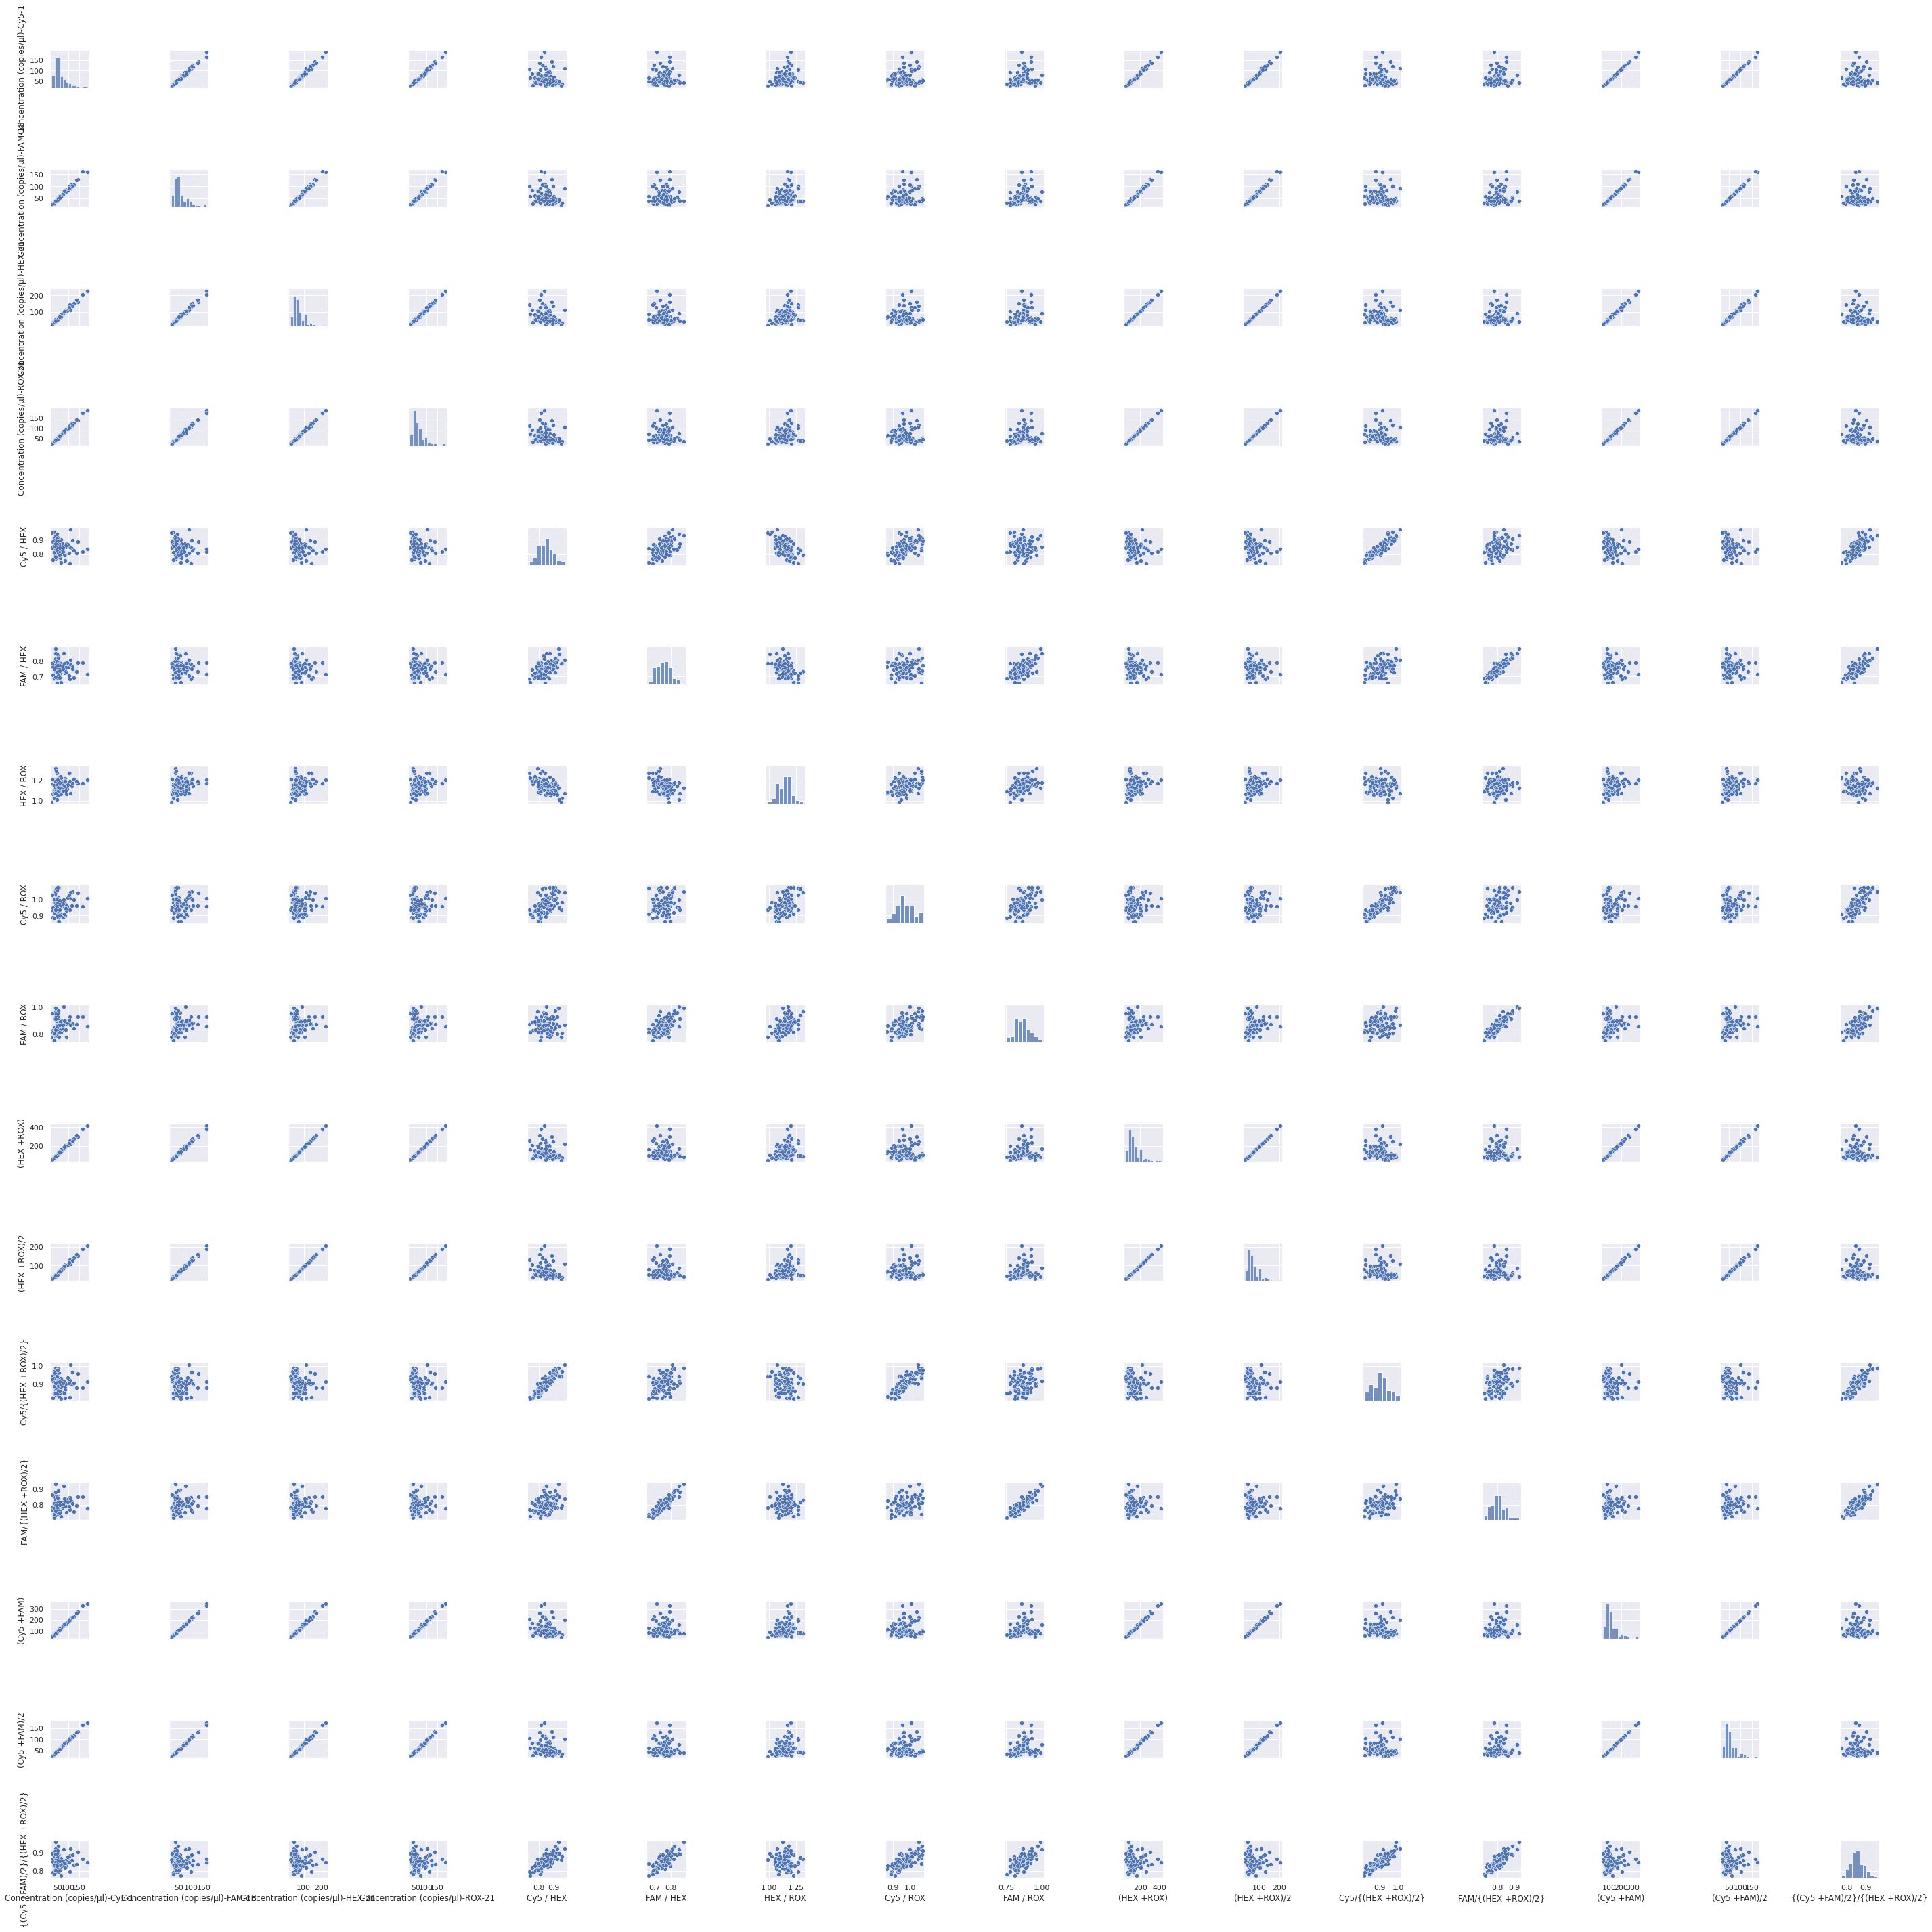

In [60]:
_ = sns.pairplot(data_kj)

In [118]:
data_kj['sample_type'] = data_kj['Sample'].apply(lambda x: 'positive' if x=='21AH00830' else 'negative')

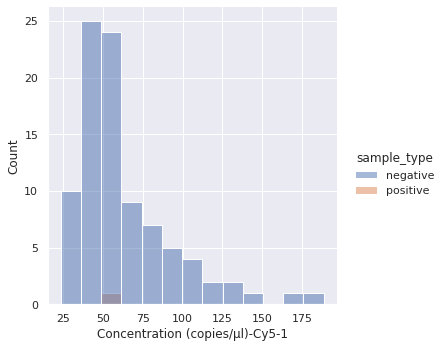

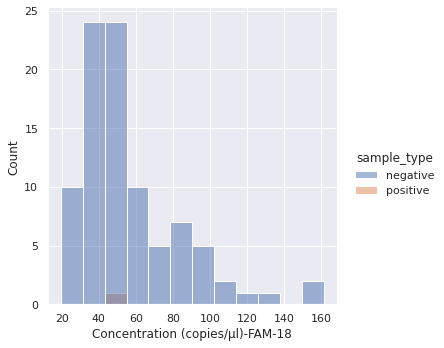

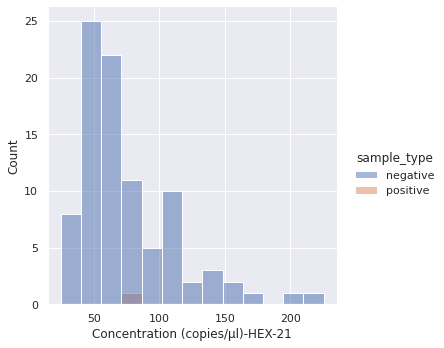

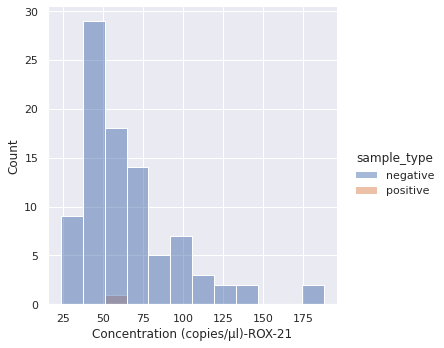

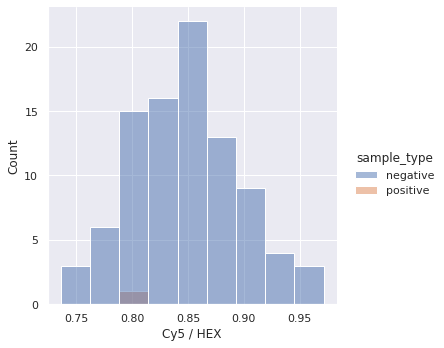

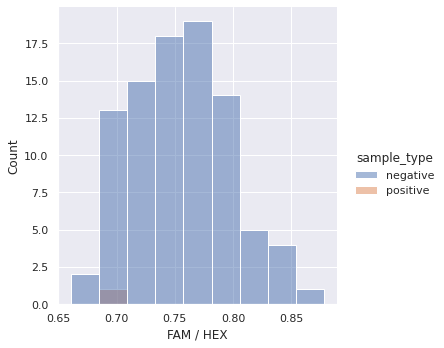

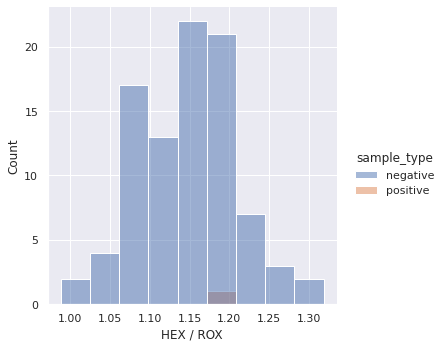

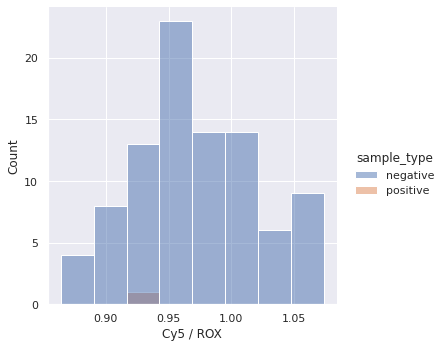

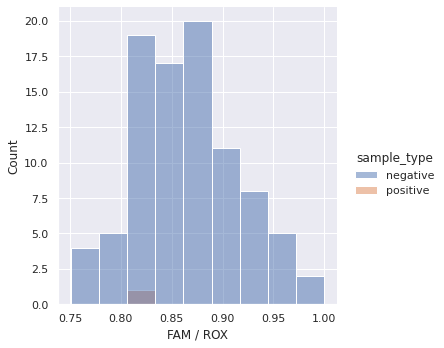

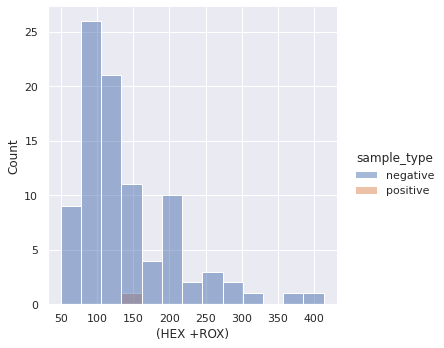

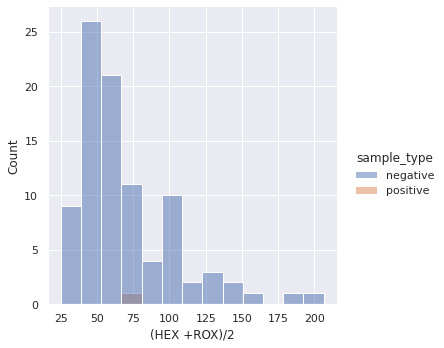

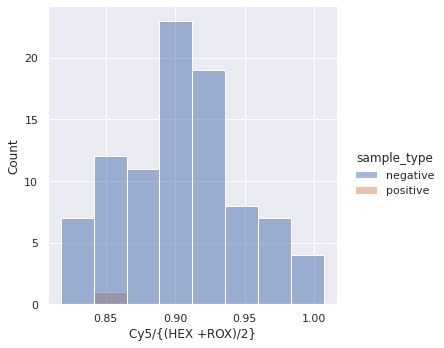

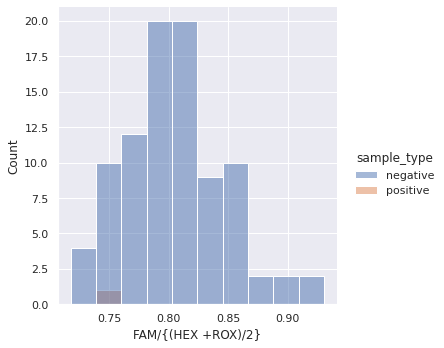

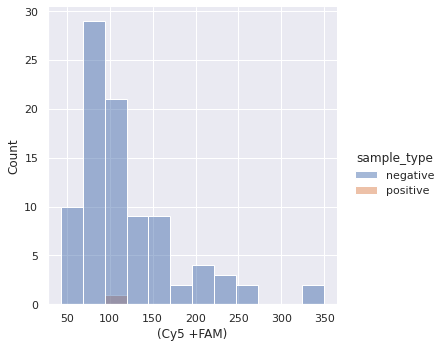

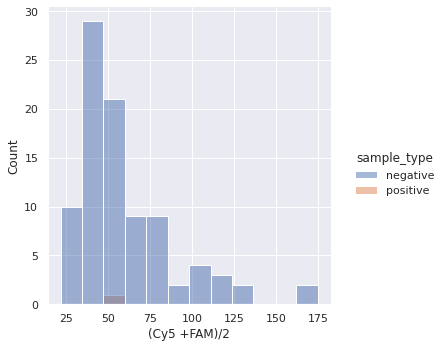

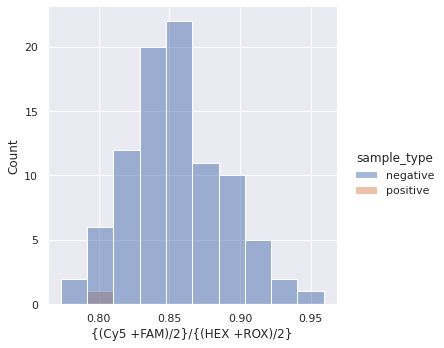

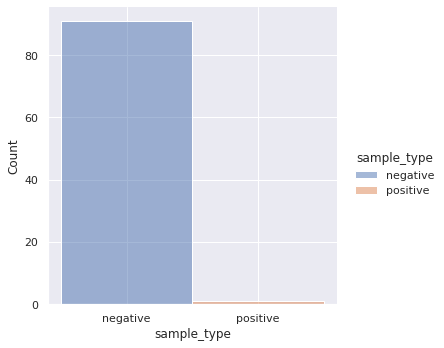

In [68]:
for column_name in data_kj.columns:
  if column_name in ['Time', '备注', 'Sample']:
    continue
  _ = sns.displot(data_kj, x=column_name, hue='sample_type')

### z 值分析

In [122]:
data_kj_negative = data_kj[data_kj['sample_type'] == 'negative']
data_kj_positive = data_kj[data_kj['sample_type'] == 'positive']
for column_name in data_kj_positive.columns:
  if 'copies' in column_name:
    continue
  if column_name in ['No.', '备注', 'Time', 'Sample', 'sample_type']:
    continue
  data_kj_positive['%s-zvalue' % column_name] = data_kj_positive[column_name].apply(
      lambda x: (x - data_kj_negative.mean()[column_name]) / data_kj_negative.std()[column_name])
for column_name in data_kj_negative.columns:
  if 'copies' in column_name:
    continue
  if column_name in ['No.', '备注', 'Time', 'Sample', 'sample_type']:
    continue
  data_kj_negative['%s-zvalue' % column_name] = data_kj_negative[column_name].apply(
      lambda x: (x - data_kj_negative.mean()[column_name]) / data_kj_negative.std()[column_name])

In [123]:
data_kj_negative.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No.,91.0,4.600000e+01,26.413380,1.000000,23.500000,46.000000,68.500000,91.000000
Concentration (copies/μl)-Cy5-1,91.0,6.338681e+01,30.817326,23.500000,43.450000,54.100000,74.550000,188.600000
Concentration (copies/μl)-FAM-18,91.0,5.666264e+01,27.916816,19.500000,37.950000,48.100000,66.850000,161.200000
Concentration (copies/μl)-HEX-21,91.0,7.538242e+01,37.433166,24.800000,51.500000,65.400000,89.050000,225.400000
Concentration (copies/μl)-ROX-21,91.0,6.530879e+01,31.152673,23.600000,44.150000,55.500000,76.600000,187.600000
Cy5 / HEX,91.0,8.470794e-01,0.048111,0.736111,0.813705,0.846154,0.875844,0.971556
FAM / HEX,91.0,7.539013e-01,0.043752,0.660682,0.722599,0.753316,0.783310,0.878220
HEX / ROX,91.0,1.147997e+00,0.062543,0.988048,1.098009,1.146067,1.190457,1.318766
Cy5 / ROX,91.0,9.707402e-01,0.050027,0.864217,0.937594,0.963107,1.002547,1.073593
FAM / ROX,91.0,8.642446e-01,0.050958,0.750636,0.829433,0.862330,0.896761,1.000000


In [124]:
data_kj_positive.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No.,1.0,92.000000,NaN,92.000000,92.000000,92.000000,92.000000,92.000000
Concentration (copies/μl)-Cy5-1,1.0,58.300000,NaN,58.300000,58.300000,58.300000,58.300000,58.300000
Concentration (copies/μl)-FAM-18,1.0,50.700000,NaN,50.700000,50.700000,50.700000,50.700000,50.700000
Concentration (copies/μl)-HEX-21,1.0,73.300000,NaN,73.300000,73.300000,73.300000,73.300000,73.300000
Concentration (copies/μl)-ROX-21,1.0,62.300000,NaN,62.300000,62.300000,62.300000,62.300000,62.300000
Cy5 / HEX,1.0,0.795362,NaN,0.795362,0.795362,0.795362,0.795362,0.795362
FAM / HEX,1.0,0.691678,NaN,0.691678,0.691678,0.691678,0.691678,0.691678
HEX / ROX,1.0,1.176565,NaN,1.176565,1.176565,1.176565,1.176565,1.176565
Cy5 / ROX,1.0,0.935795,NaN,0.935795,0.935795,0.935795,0.935795,0.935795
FAM / ROX,1.0,0.813804,NaN,0.813804,0.813804,0.813804,0.813804,0.813804


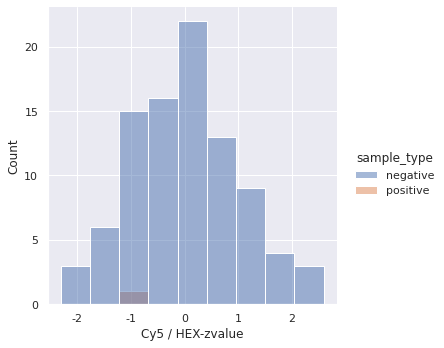

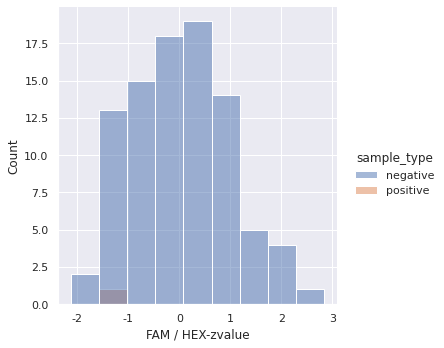

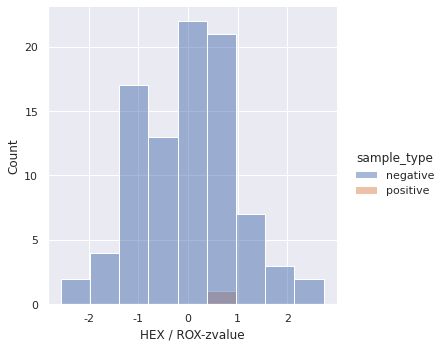

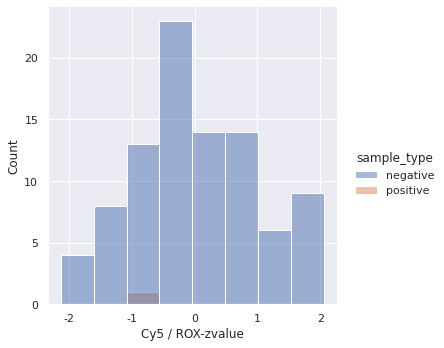

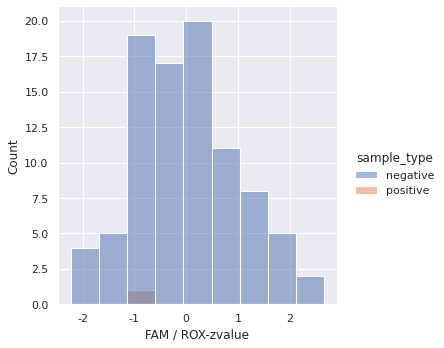

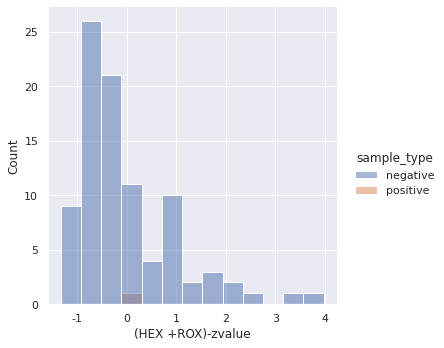

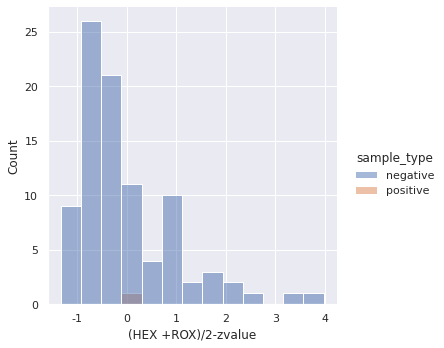

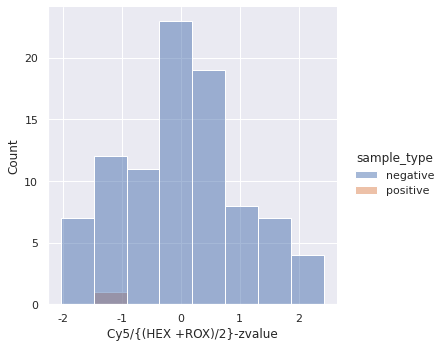

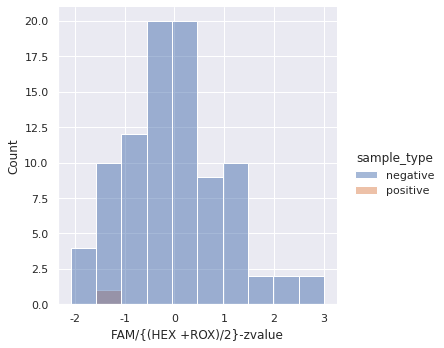

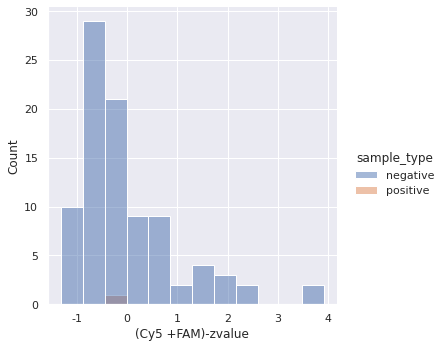

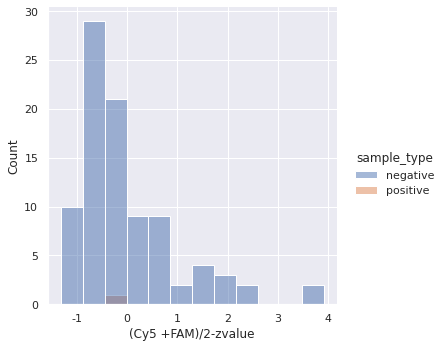

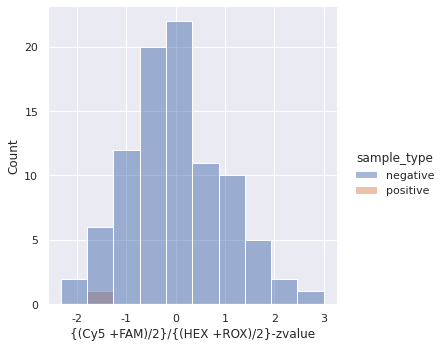

In [126]:
data_kj_z = pd.concat([data_kj_negative, data_kj_positive])
for column_name in data_kj_z.columns:
  if 'zvalue' not in column_name:
    continue
  _ = sns.displot(data_kj_z, x=column_name, hue='sample_type')